<a href="https://colab.research.google.com/github/Sshubam/PyTorch-Code/blob/main/PyTorch_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import pandas

In [ ]:
from torchvision import datasets 
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [ ]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [ ]:
len(cifar10)

50000

In [ ]:
cifar10[99]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F6F77A01750>, 1)

In [ ]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F6F779FF950>,
 1,
 'automobile')

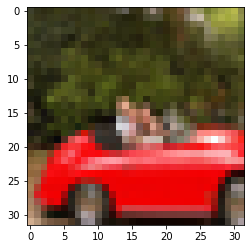

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
from torchvision import transforms
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [ ]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [ ]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [ ]:
cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data-unversioned/p1ch7/
    Split: Train

In [ ]:
img_t, _ = tensor_cifar10[99]
img_t, _

(tensor([[[0.2431, 0.1961, 0.1804,  ..., 0.6549, 0.7176, 0.5373],
          [0.2471, 0.2157, 0.2039,  ..., 0.6392, 0.6706, 0.5686],
          [0.2275, 0.2510, 0.2196,  ..., 0.6000, 0.5882, 0.4824],
          ...,
          [0.6745, 0.5608, 0.5098,  ..., 0.3686, 0.5529, 0.5451],
          [0.7176, 0.5882, 0.3137,  ..., 0.3176, 0.5294, 0.5608],
          [0.8196, 0.7137, 0.5451,  ..., 0.2314, 0.5098, 0.6627]],
 
         [[0.2510, 0.1961, 0.1725,  ..., 0.6745, 0.7216, 0.5333],
          [0.2549, 0.2078, 0.1961,  ..., 0.6627, 0.6824, 0.5725],
          [0.2431, 0.2588, 0.2353,  ..., 0.6078, 0.6039, 0.5020],
          ...,
          [0.5294, 0.4314, 0.2196,  ..., 0.2941, 0.4235, 0.4118],
          [0.5725, 0.4627, 0.2510,  ..., 0.2824, 0.4627, 0.4902],
          [0.6824, 0.5922, 0.4275,  ..., 0.2118, 0.4667, 0.6118]],
 
         [[0.1725, 0.1020, 0.0745,  ..., 0.2706, 0.2980, 0.2824],
          [0.1451, 0.1020, 0.1059,  ..., 0.2392, 0.2941, 0.3020],
          [0.1412, 0.1451, 0.1451,  ...,

In [ ]:
type(img_t)

torch.Tensor

In [ ]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [ ]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

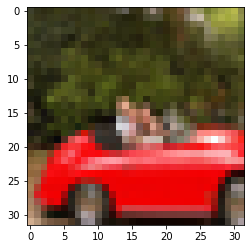

In [ ]:
plt.imshow(img_t.permute(1, 2, 0)) #Changed CXHXW to HXWXC
#200 Pg. No.(acc to pdf)

In [ ]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
imgs.view(3, -1).mean(dim=1)  #shape = (3, 1024)

tensor([0.4914, 0.4822, 0.4465])

In [ ]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [ ]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [ ]:
transformed_cifar10.data.shape

(50000, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


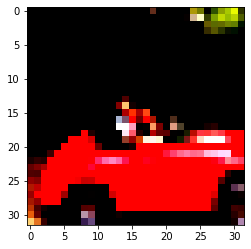

In [ ]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [ ]:
from torchvision import datasets, transforms
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [ ]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [ ]:
label_map = {0: 0, 2: 1} #first label maps to first and second label changes to first
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]] #only b/w 0 and 1 

cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [ ]:
class_names

['airplane', 'bird']

In [ ]:
32*32*3

3072

In [ ]:
import torch.nn as nn
n_out = 2
model = nn.Sequential(nn.Linear(3072, 512,),
                      nn.Tanh(),
                      nn.Linear(512, n_out,))

In [ ]:
model = nn.Sequential(
    nn.Linear(3072, 512,),
    nn.Tanh(),
    nn.Linear(512, n_out,),
    nn.Softmax(dim=1)
)

In [ ]:
def softmax(x):
  return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [ ]:
softmax(x).sum()

tensor(1.)

In [ ]:
softmax = nn.Softmax(dim=1)

In [ ]:
x = torch.tensor([[1.0, 2.0, 3.0],[1.0, 2.0, 3.0]])

In [ ]:
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


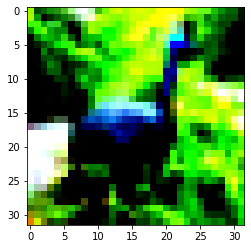

In [ ]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2, 0))
plt.show()

In [ ]:
img.shape

torch.Size([3, 32, 32])

In [ ]:
img_batch = img.view(-1).unsqueeze(0)
img_batch.shape

torch.Size([1, 3072])

In [ ]:
img[0].shape

torch.Size([32, 32])

In [ ]:
img[1]

tensor([[ 1.3369,  0.2740,  0.4028,  ...,  0.3867,  0.3867,  0.0968],
        [ 1.4497,  0.5961, -0.2253,  ...,  0.3062,  0.3062,  0.0646],
        [ 1.0954,  1.1276,  0.6444,  ...,  0.2579, -0.0481, -0.1286],
        ...,
        [ 0.4028,  0.5156,  0.5317,  ...,  0.1774,  0.4028,  0.8538],
        [ 0.5478,  0.6605,  0.6605,  ...,  0.1130,  0.4028,  0.8860],
        [ 0.4834,  0.9504,  0.4995,  ...,  0.1774,  0.1613,  0.7572]])

In [ ]:
img_batch

tensor([[ 0.6139, -0.3228, -0.1164,  ..., -1.2732, -1.3182, -1.0484]])

In [ ]:
img_batch.shape

torch.Size([1, 3072])

In [ ]:
out = model(img_batch)
out

tensor([[0.4949, 0.5051]], grad_fn=<SoftmaxBackward>)

In [ ]:
_, index  = torch.max(out, dim=1)
index

tensor([1])

In [ ]:
out

tensor([[0.4949, 0.5051]], grad_fn=<SoftmaxBackward>)

In [ ]:
out = torch.tensor([
    [0.6, 0.4],
    [0.9, 0.1],
    [0.3, 0.7],
    [0.2, 0.8],
])
class_index = torch.tensor([0, 0, 1, 1]).unsqueeze(1)

truth = torch.zeros((4,2))
truth.scatter_(dim=1, index=class_index, value=1.0)
truth

tensor([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])

In [ ]:
img, label

(tensor([[[ 0.6139, -0.3228, -0.1164,  ..., -0.2593, -0.2752, -0.5451],
          [ 0.6615, -0.1482, -0.8467,  ..., -0.3228, -0.3228, -0.5768],
          [ 0.2329,  0.2646, -0.1005,  ..., -0.3387, -0.6562, -0.7515],
          ...,
          [ 0.2170,  0.2646,  0.1535,  ..., -0.5768, -0.4498,  0.0106],
          [ 0.5980,  0.4393,  0.3281,  ..., -0.6404, -0.4340,  0.0265],
          [ 0.9156,  0.8044,  0.4551,  ..., -0.4975, -0.5451, -0.0529]],
 
         [[ 1.3369,  0.2740,  0.4028,  ...,  0.3867,  0.3867,  0.0968],
          [ 1.4497,  0.5961, -0.2253,  ...,  0.3062,  0.3062,  0.0646],
          [ 1.0954,  1.1276,  0.6444,  ...,  0.2579, -0.0481, -0.1286],
          ...,
          [ 0.4028,  0.5156,  0.5317,  ...,  0.1774,  0.4028,  0.8538],
          [ 0.5478,  0.6605,  0.6605,  ...,  0.1130,  0.4028,  0.8860],
          [ 0.4834,  0.9504,  0.4995,  ...,  0.1774,  0.1613,  0.7572]],
 
         [[-0.4487, -0.7935, -0.1939,  ..., -0.6136, -0.6736, -0.8535],
          [-0.4487, -0.9734,

In [ ]:
# torch.tensor([label])

In [ ]:
(img.view(-1).unsqueeze(0))

tensor([[ 0.6139, -0.3228, -0.1164,  ..., -1.2732, -1.3182, -1.0484]])

In [ ]:
import torch.optim as optim

In [ ]:
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 2),
    nn.LogSoftmax(dim=1))

learning_rate = 1e-2  # THAT IS 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()
n_epochs = 10

for epoch in range(n_epochs):
  for img, label in cifar2:
    out = model(img.view(-1).unsqueeze(0))
    loss = loss_fn(out, torch.tensor([label]))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 3.294050
Epoch: 1, Loss: 5.458501
Epoch: 2, Loss: 8.398191
Epoch: 3, Loss: 7.562899
Epoch: 4, Loss: 5.232411
Epoch: 5, Loss: 9.496823
Epoch: 6, Loss: 12.156941
Epoch: 7, Loss: 5.626000
Epoch: 8, Loss: 12.797202
Epoch: 9, Loss: 13.618558


In [ ]:
loss = nn.NLLLoss()

img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.0029, grad_fn=<NllLossBackward>)

In [ ]:
img.shape

torch.Size([3, 32, 32])

In [ ]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
16*3*32*32

49152

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.402303
Epoch: 1, Loss: 0.424649
Epoch: 2, Loss: 0.416935
Epoch: 3, Loss: 0.310901
Epoch: 4, Loss: 0.456638
Epoch: 5, Loss: 0.354271
Epoch: 6, Loss: 0.380407
Epoch: 7, Loss: 0.641014
Epoch: 8, Loss: 0.444163
Epoch: 9, Loss: 0.551829
Epoch: 10, Loss: 0.499591
Epoch: 11, Loss: 0.365884
Epoch: 12, Loss: 0.230260
Epoch: 13, Loss: 0.428486
Epoch: 14, Loss: 0.255712
Epoch: 15, Loss: 0.408179
Epoch: 16, Loss: 0.303632
Epoch: 17, Loss: 0.465587
Epoch: 18, Loss: 0.209501
Epoch: 19, Loss: 0.118597
Epoch: 20, Loss: 0.124668
Epoch: 21, Loss: 0.276816
Epoch: 22, Loss: 0.277068
Epoch: 23, Loss: 0.211741
Epoch: 24, Loss: 0.156737
Epoch: 25, Loss: 0.108634
Epoch: 26, Loss: 0.191409
Epoch: 27, Loss: 0.094236
Epoch: 28, Loss: 0.179737
Epoch: 29, Loss: 0.359226
Epoch: 30, Loss: 0.157121
Epoch: 31, Loss: 0.284281
Epoch: 32, Loss: 0.295614
Epoch: 33, Loss: 0.194354
Epoch: 34, Loss: 0.109507
Epoch: 35, Loss: 0.335104
Epoch: 36, Loss: 0.185769
Epoch: 37, Loss: 0.107803
Epoch: 38, Loss: 0.104

In [ ]:
imgs.shape

torch.Size([16, 3, 32, 32])

In [ ]:
16*3*32*32
# RuntimeError: mat1 and mat2 shapes cannot be multiplied (16x12288 and 3072x512)

49152

In [ ]:
#TO CALCULATE TRAIN ACCURACY
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.998800


In [ ]:
labels

tensor([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=True)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.812000


In [ ]:
for imgs, labels in train_loader:
  print(labels)

tensor([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0])
tensor([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0])
tensor([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0])
tensor([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0])
tensor([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [ ]:
_, predicted = torch.max(outputs, dim=1) # predicited will give index of the max value along the first dimension
_, predicted

(tensor([-1.7218e-01, -4.8411e-02, -7.7538e-03, -2.1457e-02, -9.5635e-03,
         -6.4716e-01, -4.4193e-04, -6.0292e-02, -9.2341e-03, -2.6579e-02,
         -1.2979e-01, -1.5497e-06, -1.4331e-02, -1.1736e-01, -1.3673e-01,
         -3.1447e-03]),
 tensor([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0]))

In [ ]:
for imgs, labels in train_loader:
  print(outputs)

tensor([[-1.8441e+00, -1.7218e-01],
        [-3.0521e+00, -4.8411e-02],
        [-4.8635e+00, -7.7538e-03],
        [-2.1457e-02, -3.8524e+00],
        [-9.5635e-03, -4.6546e+00],
        [-6.4716e-01, -7.4136e-01],
        [-7.7246e+00, -4.4193e-04],
        [-6.0292e-02, -2.8385e+00],
        [-4.6895e+00, -9.2341e-03],
        [-3.6409e+00, -2.6579e-02],
        [-1.2979e-01, -2.1061e+00],
        [-1.5497e-06, -1.3356e+01],
        [-4.2525e+00, -1.4331e-02],
        [-1.1736e-01, -2.2007e+00],
        [-2.0573e+00, -1.3673e-01],
        [-3.1447e-03, -5.7636e+00]])
tensor([[-1.8441e+00, -1.7218e-01],
        [-3.0521e+00, -4.8411e-02],
        [-4.8635e+00, -7.7538e-03],
        [-2.1457e-02, -3.8524e+00],
        [-9.5635e-03, -4.6546e+00],
        [-6.4716e-01, -7.4136e-01],
        [-7.7246e+00, -4.4193e-04],
        [-6.0292e-02, -2.8385e+00],
        [-4.6895e+00, -9.2341e-03],
        [-3.6409e+00, -2.6579e-02],
        [-1.2979e-01, -2.1061e+00],
        [-1.5497e-06, -1.33

In [ ]:
outputs.shape

torch.Size([16, 2])

In [ ]:
imgs.shape

torch.Size([16, 3, 32, 32])

In [ ]:
train_loader.batch_size

64

In [ ]:
for imgs, labels in train_loader:
  print(imgs.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 32, 32])
torch.Size([64, 3, 3

In [ ]:
connected_model = nn.Sequential(
    nn.Linear(3072, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 128),
    nn.Tanh(),
    nn.Linear(128, 2)
)

loss_fn = nn.CrossEntropyLoss()

In [ ]:
numel_list = [p.numel()
             for p in connected_model.parameters() #p stands for Parameter
             if p.requires_grad == True]
sum(numel_list), numel_list
#just 3.7 Million nvm :0

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [ ]:
linear = nn.Linear(3072, 1024)
linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

-------------------------END OF NOTEBOOK--------------------------